Sebastian Raschka, 2014 - 2016  
`mlxtend`, a library of extension and helper modules for Python's data analysis and machine learning libraries

- GitHub repository: https://github.com/rasbt/mlxtend
- Documentation: http://rasbt.github.io/mlxtend/

View this page in [jupyter nbviewer](http://nbviewer.ipython.org/github/rasbt/mlxtend/blob/master/docs/sources/_ipynb_templates/regressor/linear_regression.ipynb)

In [1]:
%load_ext watermark
%watermark -a 'Sebastian Raschka' -u -d -v -p matplotlib,numpy,scipy,mlxtend

Sebastian Raschka 
last updated: 2016-09-28 

CPython 3.5.2
IPython 5.1.0

matplotlib 1.5.1
numpy 1.10.4
scipy 0.17.1
mlxtend 0.4.3dev0


In [2]:
%matplotlib inline

# StackingCVClassifier

An ensemble-learning meta-classifier for stacking using cross-validation to prepare the inputs for the level-2 classifier to prevent overfitting.

> from mlxtend.classifier import StackingCVClassifier

# Overview

Stacking is an ensemble learning technique to combine multiple classification models via a meta-classifier. The `StackingCVClassifier` extends the standard stacking algorithm (implemented as [`StackingClassifier`](StackingClassifier.md)) using cross-validation to prepare the input data for the level-2 classifier. 

In the standard stacking procedure, the first-level classifiers are fit to the same training set that is used prepare the inputs for the second-level classifier, which may lead to overfitting. The `StackingCVClassifier`, however, uses the concept of cross-validation: the dataset is split into *k* folds, and in *k* successive rounds, *k-1* folds are used to fit the first level classifier; in each round, the first-level classifiers are then applied to the remaining 1 subset that was not used for model fitting in each iteration. The resulting predictions are then stacked and provided -- as input data -- to the second-level classifier. After the training of the `StackingCVClassifier`, the first-level classifiers are fit to the entire dataset as illustrated in the figure below.

![](./StackingCVClassifier_files/stacking_cv_classification_overview.png)

More formally, the Stacking Cross-Validation algorithm can be summarized as follows (source: [1]):
    
![](./StackingCVClassifier_files/stacking_cv_algorithm.png)

### References


- [1] Tang, J., S. Alelyani, and H. Liu. "[Data Classification: Algorithms and Applications.](https://books.google.com/books?id=nwQZCwAAQBAJ&lpg=PA500&dq=stacking%20classifier%20subsets&pg=PA499#v=onepage&q&f=false)" Data Mining and Knowledge Discovery Series, CRC Press (2015): pp. 498-500.
- [2] Wolpert, David H. "[Stacked generalization.](http://www.sciencedirect.com/science/article/pii/S0893608005800231)" Neural networks 5.2 (1992): 241-259.

# Examples

## Example 1 - Simple Stacking CV Classification

In [1]:
from sklearn import datasets

iris = datasets.load_iris()
X, y = iris.data[:, 1:3], iris.target

In [8]:
from sklearn import cross_validation
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import StackingCVClassifier
import numpy as np

clf1 = KNeighborsClassifier(n_neighbors=1)
clf2 = RandomForestClassifier(random_state=42)
clf3 = GaussianNB()
lr = LogisticRegression()
sclf = StackingCVClassifier(classifiers=[clf1, clf2, clf3], 
                            meta_classifier=lr,
                            random_state=42)

print('3-fold cross validation:\n')

for clf, label in zip([clf1, clf2, clf3, sclf], 
                      ['KNN', 
                       'Random Forest', 
                       'Naive Bayes',
                       'StackingClassifier']):

    scores = cross_validation.cross_val_score(clf, X, y, 
                                              cv=3, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" 
          % (scores.mean(), scores.std(), label))

3-fold cross validation:

Accuracy: 0.91 (+/- 0.01) [KNN]
Accuracy: 0.90 (+/- 0.03) [Random Forest]
Accuracy: 0.92 (+/- 0.03) [Naive Bayes]
Accuracy: 0.93 (+/- 0.02) [StackingClassifier]


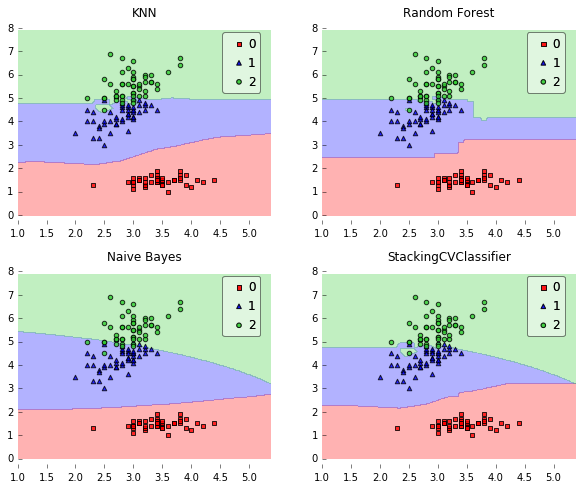

In [9]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

gs = gridspec.GridSpec(2, 2)

fig = plt.figure(figsize=(10,8))

for clf, lab, grd in zip([clf1, clf2, clf3, sclf], 
                         ['KNN', 
                          'Random Forest', 
                          'Naive Bayes',
                          'StackingCVClassifier'],
                          itertools.product([0, 1], repeat=2)):

    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf)
    plt.title(lab)
plt.show()

## Example 2 - Using Probabilities as Meta-Features

Alternatively, the class-probabilities of the first-level classifiers can be used to train the meta-classifier (2nd-level classifier) by setting `use_probas=True`. For example, in a 3-class setting with 2 level-1 classifiers, these classifiers may make the following "probability" predictions for 1 training sample:

- classifier 1: [0.2, 0.5, 0.3]
- classifier 2: [0.3, 0.4, 0.4]

This results in *k* features, where *k* = [n_classes * n_classifiers], by stacking these level-1 probabilities:

- [0.2, 0.5, 0.3, 0.3, 0.4, 0.4]


In [10]:
clf1 = KNeighborsClassifier(n_neighbors=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()
lr = LogisticRegression()
sclf = StackingCVClassifier(classifiers=[clf1, clf2, clf3],
                            use_probas=True,
                            meta_classifier=lr,
                            random_state=42)

print('3-fold cross validation:\n')

for clf, label in zip([clf1, clf2, clf3, sclf], 
                      ['KNN', 
                       'Random Forest', 
                       'Naive Bayes',
                       'StackingClassifier']):

    scores = cross_validation.cross_val_score(clf, X, y, 
                                              cv=3, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" 
          % (scores.mean(), scores.std(), label))

3-fold cross validation:

Accuracy: 0.91 (+/- 0.01) [KNN]
Accuracy: 0.91 (+/- 0.06) [Random Forest]
Accuracy: 0.92 (+/- 0.03) [Naive Bayes]
Accuracy: 0.94 (+/- 0.03) [StackingClassifier]


## Example 3 - Stacked CV Classification and GridSearch

To set up a parameter grid for scikit-learn's `GridSearch`, we simply provide the estimator's names in the parameter grid -- in the special case of the meta-regressor, we append the `'meta-'` prefix.

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV
from mlxtend.classifier import StackingCVClassifier

# Initializing models

clf1 = KNeighborsClassifier(n_neighbors=1)
clf2 = RandomForestClassifier(random_state=42)
clf3 = GaussianNB()
lr = LogisticRegression()
sclf = StackingCVClassifier(classifiers=[clf1, clf2, clf3], 
                            meta_classifier=lr,
                            random_state=42)

params = {'kneighborsclassifier__n_neighbors': [1, 5],
          'randomforestclassifier__n_estimators': [10, 50],
          'meta-logisticregression__C': [0.1, 10.0]}

grid = GridSearchCV(estimator=sclf, 
                    param_grid=params, 
                    cv=5,
                    refit=True)
grid.fit(X, y)

for params, mean_score, scores in grid.grid_scores_:
    print("%0.3f (+/-%0.03f) for %r"
        % (mean_score, scores.std() / 2.0, params))

0.667 (+/-0.000) for {'kneighborsclassifier__n_neighbors': 1, 'randomforestclassifier__n_estimators': 10, 'meta-logisticregression__C': 0.1}
0.667 (+/-0.000) for {'kneighborsclassifier__n_neighbors': 1, 'randomforestclassifier__n_estimators': 50, 'meta-logisticregression__C': 0.1}
0.940 (+/-0.024) for {'kneighborsclassifier__n_neighbors': 1, 'randomforestclassifier__n_estimators': 10, 'meta-logisticregression__C': 10.0}
0.927 (+/-0.024) for {'kneighborsclassifier__n_neighbors': 1, 'randomforestclassifier__n_estimators': 50, 'meta-logisticregression__C': 10.0}
0.667 (+/-0.000) for {'kneighborsclassifier__n_neighbors': 5, 'randomforestclassifier__n_estimators': 10, 'meta-logisticregression__C': 0.1}
0.667 (+/-0.000) for {'kneighborsclassifier__n_neighbors': 5, 'randomforestclassifier__n_estimators': 50, 'meta-logisticregression__C': 0.1}
0.933 (+/-0.028) for {'kneighborsclassifier__n_neighbors': 5, 'randomforestclassifier__n_estimators': 10, 'meta-logisticregression__C': 10.0}
0.933 (+/-

In case we are planning to use a regression algorithm multiple times, all we need to do is to add an additional number suffix in the parameter grid as shown below:

In [12]:
from sklearn.grid_search import GridSearchCV

# Initializing models

clf1 = KNeighborsClassifier(n_neighbors=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()
lr = LogisticRegression()
sclf = StackingCVClassifier(classifiers=[clf1, clf1, clf2, clf3], 
                            meta_classifier=lr,
                            random_state=42)

params = {'kneighborsclassifier-1__n_neighbors': [1, 5],
          'kneighborsclassifier-2__n_neighbors': [1, 5],
          'randomforestclassifier__n_estimators': [10, 50],
          'meta-logisticregression__C': [0.1, 10.0]}

grid = GridSearchCV(estimator=sclf, 
                    param_grid=params, 
                    cv=5,
                    refit=True)
grid.fit(X, y)

for params, mean_score, scores in grid.grid_scores_:
    print("%0.3f (+/-%0.03f) for %r"
        % (mean_score, scores.std() / 2, params))

0.667 (+/-0.000) for {'randomforestclassifier__n_estimators': 10, 'meta-logisticregression__C': 0.1, 'kneighborsclassifier-1__n_neighbors': 1, 'kneighborsclassifier-2__n_neighbors': 1}
0.667 (+/-0.000) for {'randomforestclassifier__n_estimators': 50, 'meta-logisticregression__C': 0.1, 'kneighborsclassifier-1__n_neighbors': 1, 'kneighborsclassifier-2__n_neighbors': 1}
0.927 (+/-0.031) for {'randomforestclassifier__n_estimators': 10, 'meta-logisticregression__C': 10.0, 'kneighborsclassifier-1__n_neighbors': 1, 'kneighborsclassifier-2__n_neighbors': 1}
0.933 (+/-0.028) for {'randomforestclassifier__n_estimators': 50, 'meta-logisticregression__C': 10.0, 'kneighborsclassifier-1__n_neighbors': 1, 'kneighborsclassifier-2__n_neighbors': 1}
0.667 (+/-0.000) for {'randomforestclassifier__n_estimators': 10, 'meta-logisticregression__C': 0.1, 'kneighborsclassifier-1__n_neighbors': 1, 'kneighborsclassifier-2__n_neighbors': 5}
0.667 (+/-0.000) for {'randomforestclassifier__n_estimators': 50, 'meta-l

# API

In [9]:
with open('../../api_modules/mlxtend.classifier/StackingCVClassifier.md', 'r') as f:
    print(f.read())

## StackingCVClassifier

*StackingCVClassifier(classifiers, meta_classifier, use_probas=False, n_folds=2, use_features_in_secondary=False, stratify=True, random_state=None, shuffle=True, verbose=0)*

A 'Stacking Cross-Validation' classifier for scikit-learn estimators.

New in mlxtend v0.4.3

**Parameters**

- `classifiers` : array-like, shape = [n_classifiers]

    A list of classifiers.
    Invoking the `fit` method on the `StackingClassifer` will fit clones
    of these original classifiers that will
    be stored in the class attribute
    `self.clfs_`.

- `meta_classifier` : object

    The meta-classifier to be fitted on the ensemble of
    classifiers

- `use_probas` : bool (default: False)

    If True, trains meta-classifier based on predicted probabilities
    instead of class labels.

- `n_folds` : int (default=2)

    The number of folds used for while creating training data for the
    meta-classifier during fitting.

- `use_features_in_secondary` : bool (default: False)

